In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv("D:/Abhishek/angel intership/BTC_USD_2014-11-04_2022-02-05-CoinDesk.csv")

In [3]:
df.head()

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2014-11-04,324.467934,323.826186,333.539527,323.106623
1,BTC,2014-11-05,328.644408,324.424164,330.671610,320.902900
2,BTC,2014-11-06,337.921358,328.653046,342.384170,328.597125
3,BTC,2014-11-07,348.992860,337.921358,352.585895,336.236830
4,BTC,2014-11-08,341.459753,348.992860,351.651854,340.196145


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651 entries, 0 to 2650
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2651 non-null   object 
 1   Date                 2651 non-null   object 
 2   Closing Price (USD)  2651 non-null   float64
 3   24h Open (USD)       2651 non-null   float64
 4   24h High (USD)       2651 non-null   float64
 5   24h Low (USD)        2651 non-null   float64
dtypes: float64(4), object(2)
memory usage: 124.4+ KB


In [5]:
df.shape

(2651, 6)

In [6]:
df.describe()

,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
count,2651.000000,2651.000000,2651.000000,2651.000000
mean,11326.047227,11310.832106,11636.480498,10938.731592
std,16058.945900,16050.090274,16501.509178,15518.268039
min,178.016008,178.016008,211.673245,169.146791
25%,628.799573,628.254706,639.473710,618.036899
50%,6343.770757,6342.913694,6451.477818,6210.054472
75%,10433.728274,10418.196255,10780.599155,10139.027590
max,67553.948930,67554.840000,68990.900000,66316.000000


In [7]:
df['Date'].min(), df['Date'].max()

('2014-11-04', '2022-02-05')

In [8]:
#We remove the columns that we do not need as well as check missing values

In [9]:
df.drop(columns = ["24h Open (USD)","24h High (USD)","24h Low (USD)","Currency"], inplace= True)

In [10]:
df.head()

,Date,Closing Price (USD)
0,2014-11-04,324.467934
1,2014-11-05,328.644408
2,2014-11-06,337.921358
3,2014-11-07,348.992860
4,2014-11-08,341.459753


In [11]:
df.isnull().sum()

Date                   0
Closing Price (USD)    0
dtype: int64

In [12]:
# Indexing with date

In [13]:
df = df.groupby('Date')['Closing Price (USD)'].sum().reset_index()

In [14]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.index

DatetimeIndex(['2014-11-04', '2014-11-05', '2014-11-06', '2014-11-07',
               '2014-11-08', '2014-11-09', '2014-11-10', '2014-11-11',
               '2014-11-12', '2014-11-13',
               ...
               '2022-01-27', '2022-01-28', '2022-01-29', '2022-01-30',
               '2022-01-31', '2022-02-01', '2022-02-02', '2022-02-03',
               '2022-02-04', '2022-02-05'],
              dtype='datetime64[ns]', name='Date', length=2651, freq=None)

In [15]:
df.head()

,Closing Price (USD)
Date,
2014-11-04,324.467934
2014-11-05,328.644408
2014-11-06,337.921358
2014-11-07,348.992860
2014-11-08,341.459753


In [16]:
#Time Series Analysis

In [17]:
#1. Visualizing Data
#2. Sampling
#3. Checking Stationarity
#4. Decomposing

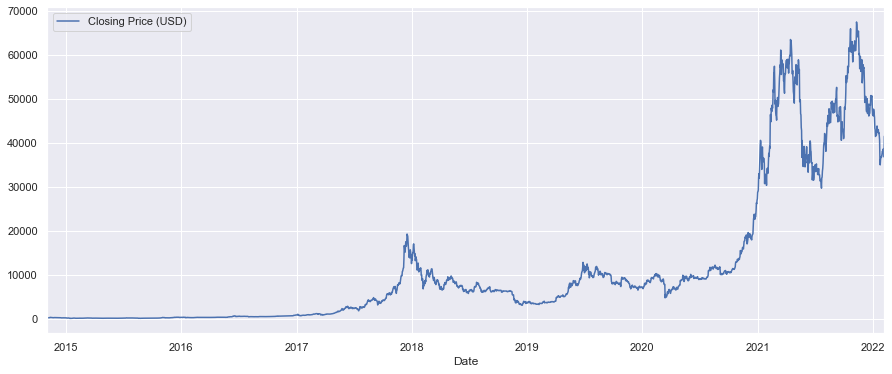

In [18]:
#1. Visualizing Data
df.plot(figsize=(15, 6))
plt.show()

In [19]:
#2. Sampling

In [20]:
y = df['Closing Price (USD)'].resample('MS').mean()

In [21]:
y.head(-50)

Date
2014-11-01      368.217948
2014-12-01      343.242902
2015-01-01      251.662607
2015-02-01      232.898834
2015-03-01      269.613109
2015-04-01      235.628538
2015-05-01      236.919821
2015-06-01      236.656969
2015-07-01      279.098126
2015-08-01      252.970410
2015-09-01      233.733431
2015-10-01      263.404409
2015-11-01      347.244637
2015-12-01      422.713597
2016-01-01      412.212114
2016-02-01      401.143531
2016-03-01      415.458741
2016-04-01      433.430821
2016-05-01      458.736886
2016-06-01      638.915809
2016-07-01      663.068713
2016-08-01      580.272145
2016-09-01      603.943646
2016-10-01      638.859315
2016-11-01      723.803995
2016-12-01      817.994835
2017-01-01      912.390033
2017-02-01     1057.593619
2017-03-01     1132.843968
2017-04-01     1209.681602
2017-05-01     1857.015939
2017-06-01     2612.252172
2017-07-01     2497.583394
2017-08-01     3810.425260
2017-09-01     4109.904866
2017-10-01     5278.901410
2017-11-01     7665.611

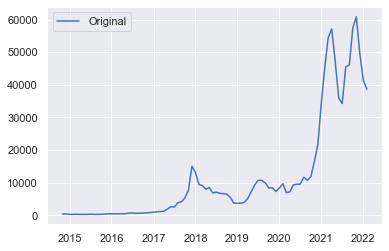

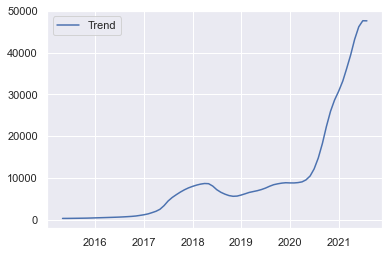

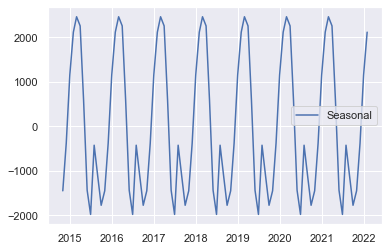

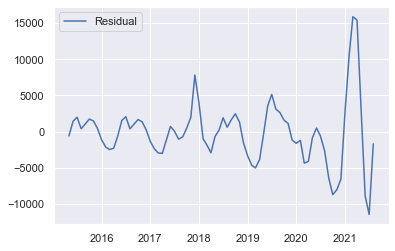

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y)

plt.plot(y, label = 'Original')
plt.legend(loc = 'best')

trend = decomposition.trend
plt.show()
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')

residual = decomposition.resid
plt.show()
plt.plot(residual, label = 'Residual')
plt.legend(loc='best')

In [23]:
#Checking Stationarity
# Augmented Dickey-Fuller(ADF) statistics to check whether your time series is stationary or non-stationary

#Null Hypothesis: The series has a unit root (value of a =1)(not stationary)

#Alternate Hypothesis: The series has no unit root (stationary)


In [24]:
from statsmodels.tsa.stattools import adfuller

In [25]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller
result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 1.338719
p-value: 0.996817
Critical Values:
	1%: -3.518
	5%: -2.900
	10%: -2.587


In [26]:
#The p-value is 0.996817, which is way above the threshold (0.05). Hence the null-hypothesis is accepted, meaning it is nonstationary.

In [27]:
# Changing it to stationary data

In [28]:
df["diff_1"] = df["Closing Price (USD)"].diff(periods=1)
df.head()

,Closing Price (USD),diff_1
Date,,
2014-11-04,324.467934,NaN
2014-11-05,328.644408,4.176474
2014-11-06,337.921358,9.276950
2014-11-07,348.992860,11.071502
2014-11-08,341.459753,-7.533107


In [29]:
result = adfuller(df["diff_1"].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -8.531346
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [30]:
# as the p value is 0 so its the stationary data

In [31]:
df.dropna()

,Closing Price (USD),diff_1
Date,,
2014-11-05,328.644408,4.176474
2014-11-06,337.921358,9.276950
2014-11-07,348.992860,11.071502
2014-11-08,341.459753,-7.533107
2014-11-09,344.745289,3.285536
...,...,...
2022-02-01,38499.876388,571.300900
2022-02-02,38722.518519,222.642131
2022-02-03,36923.500000,-1799.018519


In [32]:
# Sampling again

In [33]:
y = df['diff_1'].resample('MS').mean()

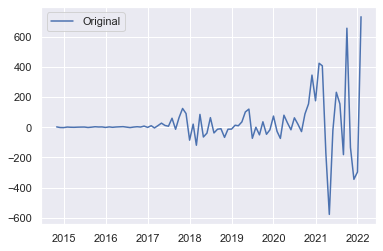

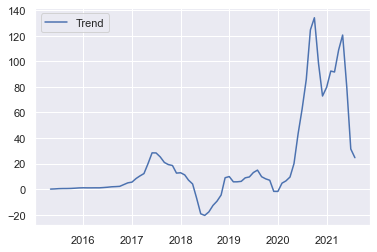

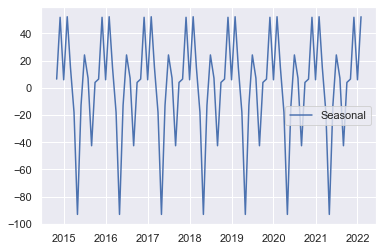

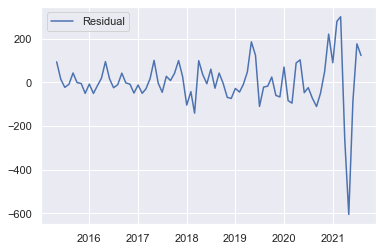

In [34]:
#Decomposing the time series into three distinct components: trend, seasonality, and noise.
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y)

plt.plot(y, label = 'Original')
plt.legend(loc = 'best')

trend = decomposition.trend
plt.show()
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')

residual = decomposition.resid
plt.show()
plt.plot(residual, label = 'Residual')
plt.legend(loc='best')

#By visualizing the decomposed components of the original time series we can say that the price of stock is unstable, along with its obvious seasonality.

In [35]:
#Time Series Forcasting using ARIMA
#We will use ARIMA for forecasting our time series. ARIMA is also denoted as ARIMA(p,d,q) where p,d,q accounts for seasonality, trend and noise in the time series data 

In [36]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [37]:
#Parameter Selection
#We use “grid search” to find the optimal set of parameters that yields the best performance for our model

In [38]:
from pylab import rcParams
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order=param,
seasonal_order=param_seasonal,
enforce_stationarity=False, 
enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1135.9531498701024
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:992.1461274832147
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:999.3621759296163
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:847.233391815792
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1004.0988864911748
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:993.9096324456445
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:860.8160544428622
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:849.1394165355604
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1125.154418376651
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:980.8583795037435
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:982.7694324250798
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:833.6632328663662
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1004.4468899871965
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:982.1394169772082
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:858.9087618715361
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:835.6211641396378
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1167.46917774052
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1017.7054108378771
ARIMA(0,

C:\Users\TEJASI\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1015.5377541036332
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:1019.2394238322996
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:864.4117981516201
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:1015.4732982715421


C:\Users\TEJASI\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1017.5628197127115
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:864.8905904543493
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:866.2807811952732
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:1117.696583616112
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:973.527809119023
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:978.5435999153278
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:827.3520680399058
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:985.7586125263109
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:975.4440617754275
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:841.1838078048465
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:829.3376372185828


#We are selecting those parameter which has minimum AIC score

In [39]:
#Fitting the ARIMA model

In [40]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1547      0.134      1.155      0.248      -0.108       0.417
ma.L1         -1.0000      0.129     -7.737      0.000      -1.253      -0.747
ar.S.L12      -0.0067      1.399     -0.005      0.996      -2.749       2.735
ma.S.L12      -0.4753      1.580     -0.301      0.764      -3.572       2.621
sigma2      3.786e+04   3.37e-06   1.12e+10      0.000    3.79e+04    3.79e+04




Running model diagnostiscs to check any unusual behaviour
1. If the model is correctly specified and the parameter estimates are reasonably close to the true values, then the residuals should have nearly the properties of white noise.


2. Plots can be used to better understand the distribution of errors beyond summary statistics. We would expect the forecast errors to be normally distributed around a zero mean.


3. The Q-Q plot can be used to quickly check the normality of the distribution of residual errors.


4. Finally, visualizing the autocorrelation for the residual errors. The x-axis shows the lag and the y-axis shows the correlation between an observation and the lag variable, where correlation values are between -1 and 1 for negative and positive correlations respectively. We would not expect there to be any correlation between the residuals. This would be shown by autocorrelation scores being below the threshold of significance (dashed and dotted horizontal lines on the plot).


C:\Users\TEJASI\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


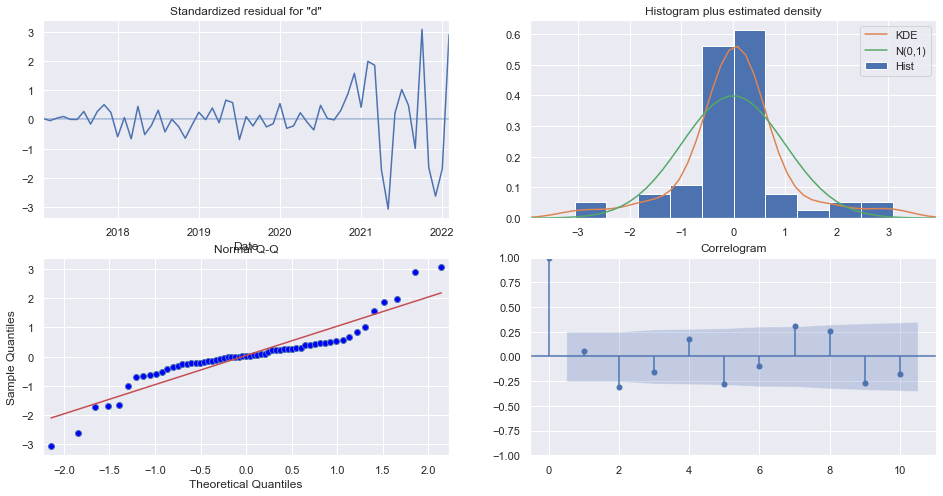

In [41]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [42]:
#The model diagnostics indicates that the model residuals are near normally distributed

In [43]:
#Validating Forecasts
#We compare predicted closing price of the time series to understand the accuracy of our forecasts

C:\Users\TEJASI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


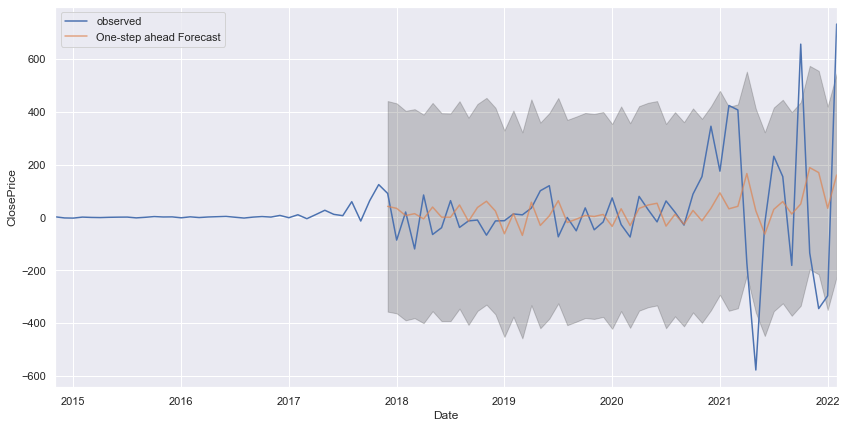

In [44]:
pred = results.get_prediction(start=pd.to_datetime('2017-12-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('ClosePrice')
plt.legend()
plt.show()

#The predicated values align well with the true values.

In [45]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-12-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 45980.39
The Root Mean Squared Error of our forecasts is 214.43


In [47]:
#MSE measures the average of the squares of the errors of an estimator i.e. the average squared difference between the estimated values and what is estimated
#RMSE tells us that our model was able to forecast the average closing price in the test set within 216 of the real closing price.

            lower diff_1  upper diff_1
2022-03-01   -102.032271    667.720575
2022-04-01   -418.559698    362.479313
2022-05-01   -651.405969    130.229886
2022-06-01   -373.129105    408.572269
2022-07-01   -240.081191    541.630147
2022-08-01   -286.465322    495.248095
2022-09-01   -479.460048    302.254368
2022-10-01     -3.221794    778.494118
2022-11-01   -407.267409    374.452349
2022-12-01   -462.495315    319.281800
2023-01-01   -474.328655    307.457995
2023-02-01    113.602636    895.390826
2023-03-01   -184.648174    700.408299


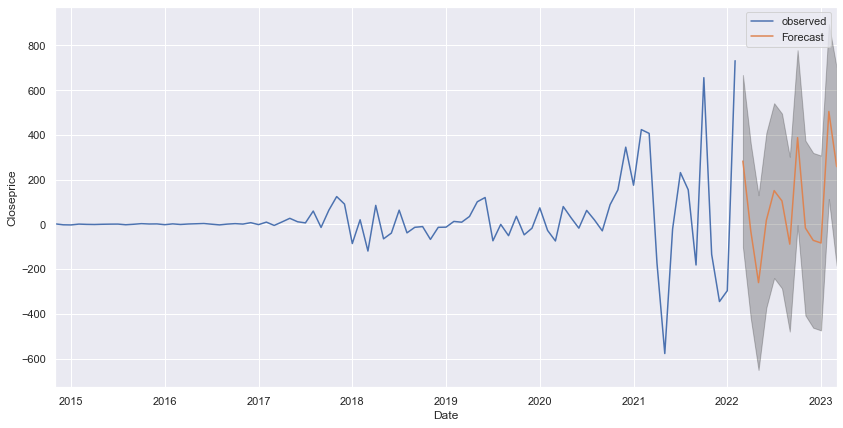

In [48]:
#Visualizing the Forecast
pred_uc = results.get_forecast(steps=13)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Closeprice')
print(pred_ci)
plt.legend()
plt.show()